In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.tree import plot_tree

In [208]:
movie_metadata=pd.read_csv("../data/movie_metadata.csv")
movie_metadata.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [215]:
movie_metadata2= movie_metadata.drop(columns=['director_name','actor_2_name','actor_1_name','actor_3_name','plot_keywords','movie_imdb_link','language', 'country','genres'])

In [216]:
movie_metadata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_1_facebook_likes     5036 non-null   float64
 6   gross                      4159 non-null   float64
 7   movie_title                5043 non-null   object 
 8   num_voted_users            5043 non-null   int64  
 9   cast_total_facebook_likes  5043 non-null   int64  
 10  facenumber_in_poster       5030 non-null   float64
 11  num_user_for_reviews       5022 non-null   float64
 12  content_rating             4740 non-null   object 
 13  budget                     4551 non-null   float

In [217]:
movie_metadata2 = movie_metadata2.dropna(axis=0, how='any')

/tmp/ipykernel_1028/1742894254.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(movie_metadata2['imdb_score'], shade=True)


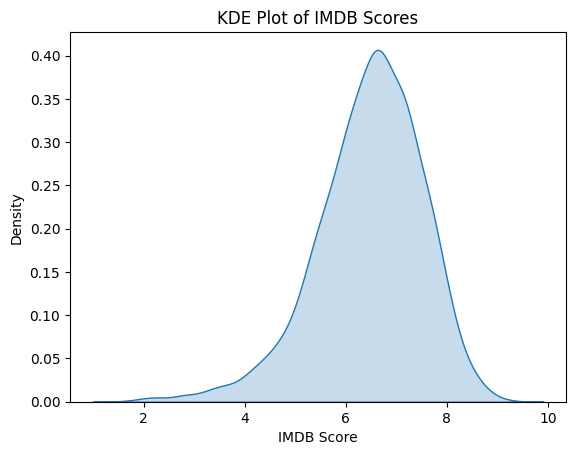

In [218]:
sns.kdeplot(movie_metadata2['imdb_score'], shade=True)

plt.xlabel('IMDB Score')
plt.ylabel('Density')
plt.title('KDE Plot of IMDB Scores')

plt.show()

# Bin the imdb_score into categories
movie_metadata2['imdb_score_cat'] = pd.cut(movie_metadata2['imdb_score'], bins=[0, 7, 10], labels=['Low', 'High'])

In [219]:
movie_metadata3 = movie_metadata2.drop(columns=['imdb_score', 'movie_title'])

In [220]:
movie_metadata3['color'] = movie_metadata3['color'].astype('category')
movie_metadata3['content_rating'] = movie_metadata3['content_rating'].astype('category')
movie_metadata3['imdb_score_cat'] = movie_metadata3['imdb_score_cat'].astype('category')

In [221]:
movie_metadata3 = pd.get_dummies(movie_metadata3, columns=['color', 'content_rating', 'imdb_score_cat'], drop_first=True)
movie_metadata3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,imdb_score_cat_High
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,False,False,False,False,True,False,False,False,False,True
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,False,False,False,False,True,False,False,False,False,True
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,False,False,False,False,True,False,False,False,False,False
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,False,False,False,False,True,False,False,False,False,True
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,False,False,False,False,True,False,False,False,False,False


In [222]:
print(movie_metadata3['imdb_score_cat_High'].value_counts()[1] / movie_metadata3['imdb_score_cat_High'].count())

0.3054892601431981


/tmp/ipykernel_1028/3456663735.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(movie_metadata3['imdb_score_cat_High'].value_counts()[1] / movie_metadata3['imdb_score_cat_High'].count())


In [223]:
def split_data(df, target, train_size=0.80, tune_size=0.50, random_state=21):
    # Split independent and dependent variables
    X = df.drop(columns=target)
    y = df[target]
    
    # Split data into training and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, stratify=y, random_state=random_state)
    
    # Split the temporary set into tuning and testing sets
    X_tune, X_test, y_tune, y_test = train_test_split(X_temp, y_temp, train_size=tune_size, stratify=y_temp, random_state=random_state+28)
    
    return X_train, X_tune, X_test, y_train, y_tune, y_test

X_train, X_tune, X_test, y_train, y_tune, y_test = split_data(movie_metadata3, 'imdb_score_cat_High')

In [224]:
kf = RepeatedStratifiedKFold(n_splits=10,n_repeats =5, random_state=42)


In [225]:
scoring = ['roc_auc','recall','balanced_accuracy']

In [226]:
param={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11]}


In [227]:
from sklearn.tree import DecisionTreeClassifier
cl= DecisionTreeClassifier(criterion='gini', random_state=1000)

In [228]:
search = GridSearchCV(cl, param, scoring=scoring, n_jobs=1, cv=kf,refit='roc_auc', verbose = 3)


In [229]:
model = search.fit(X_train, y_train)


Fitting 50 folds for each of 11 candidates, totalling 550 fits
[CV 1/50] END max_depth=1; balanced_accuracy: (test=0.685) recall: (test=0.489) roc_auc: (test=0.685) total time=   0.0s
[CV 2/50] END max_depth=1; balanced_accuracy: (test=0.653) recall: (test=0.359) roc_auc: (test=0.653) total time=   0.0s
[CV 3/50] END max_depth=1; balanced_accuracy: (test=0.626) recall: (test=0.304) roc_auc: (test=0.626) total time=   0.0s
[CV 4/50] END max_depth=1; balanced_accuracy: (test=0.657) recall: (test=0.424) roc_auc: (test=0.657) total time=   0.0s
[CV 5/50] END max_depth=1; balanced_accuracy: (test=0.620) recall: (test=0.359) roc_auc: (test=0.620) total time=   0.0s
[CV 6/50] END max_depth=1; balanced_accuracy: (test=0.681) recall: (test=0.505) roc_auc: (test=0.681) total time=   0.0s
[CV 7/50] END max_depth=1; balanced_accuracy: (test=0.693) recall: (test=0.467) roc_auc: (test=0.693) total time=   0.0s
[CV 8/50] END max_depth=1; balanced_accuracy: (test=0.612) recall: (test=0.272) roc_auc: (

In [230]:
best = model.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=5, random_state=1000)


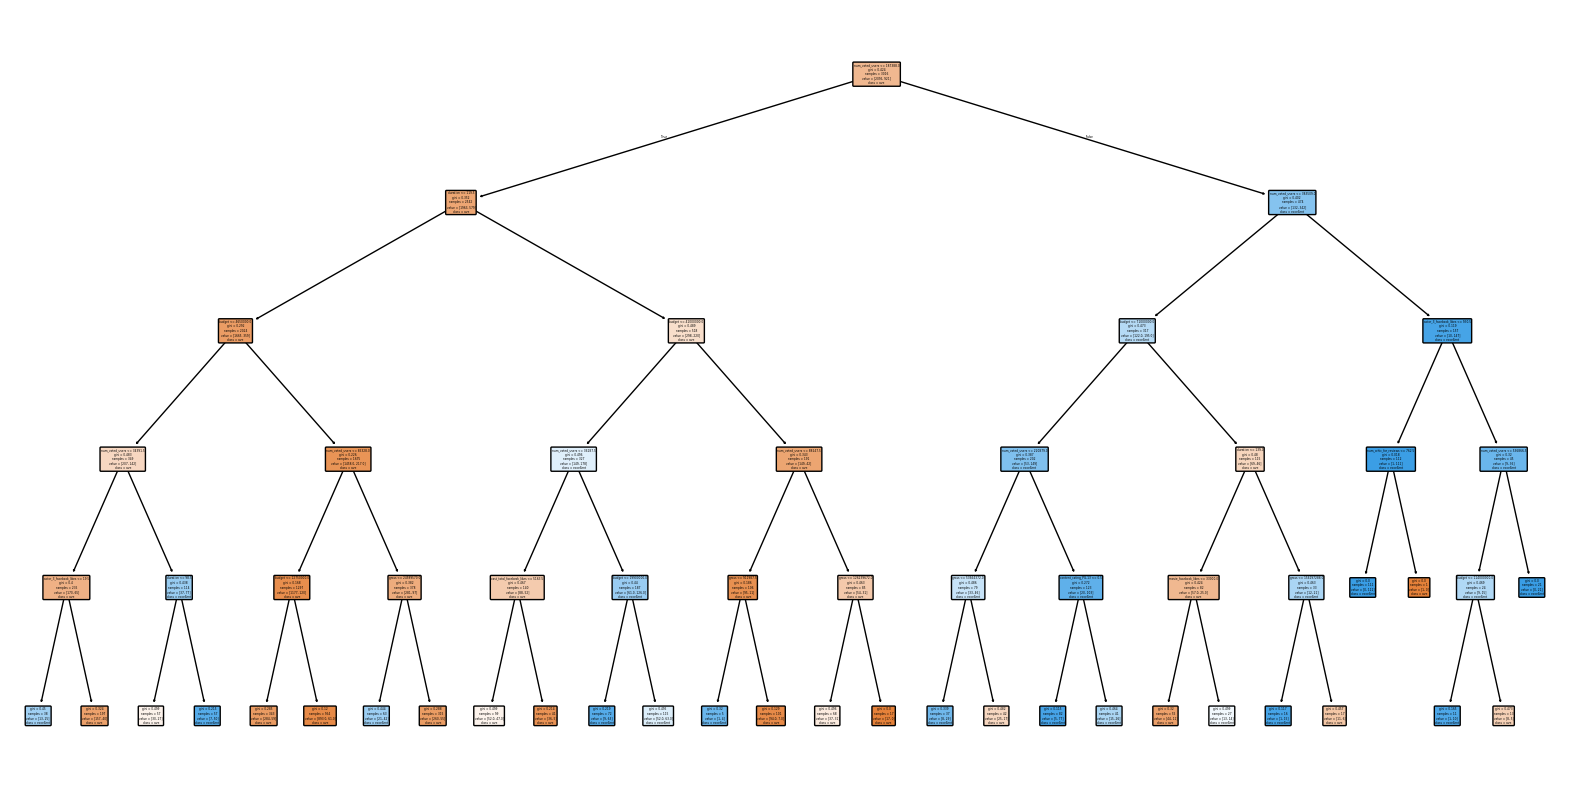

In [231]:
plt.figure(figsize=(20,10))
plot_tree(best, feature_names=X_train.columns, class_names=['ave', 'excellent'], filled=True, rounded=True)
plt.show()

In [232]:
print(model.cv_results_.keys()) 

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'split5_test_roc_auc', 'split6_test_roc_auc', 'split7_test_roc_auc', 'split8_test_roc_auc', 'split9_test_roc_auc', 'split10_test_roc_auc', 'split11_test_roc_auc', 'split12_test_roc_auc', 'split13_test_roc_auc', 'split14_test_roc_auc', 'split15_test_roc_auc', 'split16_test_roc_auc', 'split17_test_roc_auc', 'split18_test_roc_auc', 'split19_test_roc_auc', 'split20_test_roc_auc', 'split21_test_roc_auc', 'split22_test_roc_auc', 'split23_test_roc_auc', 'split24_test_roc_auc', 'split25_test_roc_auc', 'split26_test_roc_auc', 'split27_test_roc_auc', 'split28_test_roc_auc', 'split29_test_roc_auc', 'split30_test_roc_auc', 'split31_test_roc_auc', 'split32_test_roc_auc', 'split33_test_roc_auc', 'split34_test_roc_auc', 'split35_test_roc_auc', 'split36_test_roc_auc', 'split37_tes

In [233]:
# Score: 

auc = model.cv_results_['mean_test_roc_auc']
recall= model.cv_results_['mean_test_recall']
bal_acc= model.cv_results_['mean_test_balanced_accuracy']

SDauc = model.cv_results_['std_test_roc_auc']
SDrecall= model.cv_results_['std_test_recall']
SDbal_acc= model.cv_results_['std_test_balanced_accuracy']

# Parameter:
depth= np.unique(model.cv_results_['param_max_depth']).data

# DataFrame:
final_model = pd.DataFrame(list(zip(depth, auc, recall, bal_acc,SDauc,SDrecall,SDbal_acc)),
               columns =['depth','auc','recall','bal_acc','aucSD','recallSD','bal_accSD'])

print(final_model.head())

   depth       auc    recall   bal_acc     aucSD  recallSD  bal_accSD
0      1  0.649722  0.385652  0.649722  0.028254  0.075407   0.028254
1      2  0.712561  0.378095  0.648142  0.030436  0.072034   0.027684
2      3  0.767684  0.451466  0.673522  0.031033  0.067610   0.027913
3      4  0.789049  0.515316  0.707978  0.030144  0.065397   0.028203
4      5  0.799616  0.533291  0.715007  0.029972  0.067386   0.032034


In [234]:
var_imp = pd.DataFrame(best.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(var_imp)

                           importance
num_voted_users              0.533538
budget                       0.195436
duration                     0.120635
gross                        0.088175
actor_3_facebook_likes       0.028850
cast_total_facebook_likes    0.013412
content_rating_PG-13         0.009443
movie_facebook_likes         0.006829
num_critic_for_reviews       0.003683
director_facebook_likes      0.000000
actor_1_facebook_likes       0.000000
num_user_for_reviews         0.000000
facenumber_in_poster         0.000000
actor_2_facebook_likes       0.000000
title_year                   0.000000
color_Color                  0.000000
content_rating_G             0.000000
content_rating_GP            0.000000
aspect_ratio                 0.000000
content_rating_M             0.000000
content_rating_NC-17         0.000000
content_rating_Not Rated     0.000000
content_rating_PG            0.000000
content_rating_Passed        0.000000
content_rating_R             0.000000
content_rati

In [235]:
pred_prob = model.predict_proba(X_tune)[:,1]
print(pred_prob)

[0.17201166 0.875      0.17460317 0.0639413  0.87719298 0.65789474
 0.17460317 0.20304569 0.17201166 0.0639413  0.93902439 0.0639413
 0.20304569 0.47474747 0.17201166 0.54782609 0.875      0.17460317
 0.87719298 0.20304569 0.17201166 0.0639413  0.0639413  0.06930693
 0.51851852 0.20304569 0.0639413  0.93902439 1.         0.54782609
 0.17201166 0.4047619  0.17201166 0.17201166 0.0639413  0.0639413
 0.06930693 0.12195122 0.17201166 0.0639413  0.0639413  0.20304569
 0.0639413  0.0639413  0.0639413  0.20304569 0.0639413  0.0639413
 0.20304569 0.0639413  0.17201166 0.20304569 0.0639413  0.17460317
 0.17460317 0.20304569 0.0639413  0.0639413  0.54782609 0.17201166
 0.17201166 0.0639413  0.54782609 0.35294118 0.93902439 0.87719298
 0.17201166 0.0639413  0.17201166 0.78378378 0.0639413  0.17201166
 0.0639413  0.0639413  0.0639413  1.         0.78378378 0.17201166
 0.20304569 0.63414634 0.17460317 0.0639413  0.2        0.47368421
 0.0639413  0.20304569 0.0639413  0.65789474 0.0639413  0.1746031

In [236]:
def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [True if i > y else False for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = metrics.confusion_matrix(z, thres)  
    print(con_mat)


adjust_thres(pred_prob, 0.5, y_tune)

[[233  29]
 [ 55  60]]


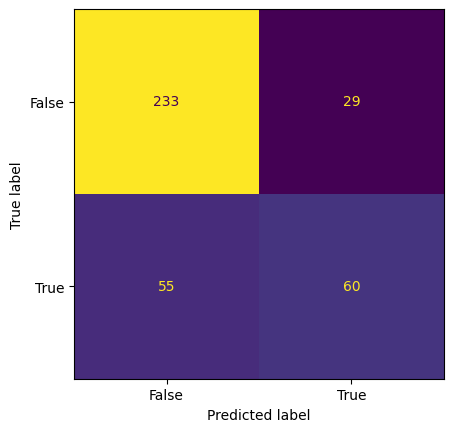

In [237]:
print(ConfusionMatrixDisplay.from_estimator(best,X_tune,y_tune,colorbar=False))

In [ ]:
movie_metadata2['pred_prob'] = model.predict_proba(movie_metadata3.drop(columns='imdb_score_cat_High'))[:,1]
sorted_dataset = movie_metadata2.sort_values(by='pred_prob', ascending=False)
sorted_dataset.head(3)

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,movie_title,num_voted_users,cast_total_facebook_likes,...,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_cat,pred_prob
2944,Black and White,400.0,144.0,258.0,834.0,6000.0,167007184.0,Casino Royale,470501,9125,...,2301.0,PG-13,150000000.0,2006.0,1000.0,8.0,2.35,0,High,1.0
3024,Color,282.0,125.0,0.0,504.0,11000.0,460935665.0,Star Wars: Episode IV - A New Hope,911097,13485,...,1470.0,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,High,1.0
3,Color,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,...,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,High,1.0


In [242]:
top_3_movies = sorted_dataset.head(3)
print(top_3_movies[['movie_title', 'pred_prob']])

                              movie_title  pred_prob
2944                       Casino Royale         1.0
3024  Star Wars: Episode IV - A New Hope         1.0
3                  The Dark Knight Rises         1.0


In [243]:
top_3_features = X_train.loc[top_3_movies.index]

In [245]:
for feature in var_imp.index:
    print(f"\nComparison for Feature: {feature}")
    print(f"Top 3 Movies: {top_3_features[feature].values}")


Comparison for Feature: num_voted_users
Top 3 Movies: [ 470501  911097 1144337]

Comparison for Feature: budget
Top 3 Movies: [1.5e+08 1.1e+07 2.5e+08]

Comparison for Feature: duration
Top 3 Movies: [144. 125. 164.]

Comparison for Feature: gross
Top 3 Movies: [1.67007184e+08 4.60935665e+08 4.48130642e+08]

Comparison for Feature: actor_3_facebook_likes
Top 3 Movies: [  834.   504. 23000.]

Comparison for Feature: cast_total_facebook_likes
Top 3 Movies: [  9125  13485 106759]

Comparison for Feature: content_rating_PG-13
Top 3 Movies: [ True False  True]

Comparison for Feature: movie_facebook_likes
Top 3 Movies: [     0  33000 164000]

Comparison for Feature: num_critic_for_reviews
Top 3 Movies: [400. 282. 813.]

Comparison for Feature: director_facebook_likes
Top 3 Movies: [  258.     0. 22000.]

Comparison for Feature: actor_1_facebook_likes
Top 3 Movies: [ 6000. 11000. 27000.]

Comparison for Feature: num_user_for_reviews
Top 3 Movies: [2301. 1470. 2701.]

Comparison for Feature: